### Supplementary Information for Programming Cell-Free Biosensors with DNA Strand Displacement Circuits

Jaeyoung K. Jung$^{1,2,3}$, Chloé M. Archuleta$^{1,2,3}$, Khalid K. Alam$^{1,2,3,4}$ and Julius B. Lucks$^{1,2,3,4,5,*}$

1 – Department of Chemical and Biological Engineering, Northwestern University (Evanston IL, USA)<br>
2 – Center for Synthetic Biology, Northwestern University (Evanston, IL, USA)<br>
3 – Center for Water Research, Northwestern University (Evanston, IL, USA)<br>
4 – Stemloop, Inc. (Evanston, IL, USA)<br>
5 – Interdisciplinary Biological Sciences Graduate Program, Northwestern University (Evanston, IL, USA)<br>
*correspondence: jblucks@northwestern.edu <br> 



### ODE Model of ROSALIND-TMSD NOT Gate for Tetracycline

Using the kinetics rates of RNAP-DNA binding, TetR-tetO binding, TetR-tet binding, and toehold-mediated strand displacmenet, simulate ROSALIND-TMSD Reactions<br>

**Reactant Species:**<br>

D_unreg - Unregulated DNA template <br>
D_tetO - Regulated DNA template with tetO operator sequence <br>
RNAP - T7 RNA Polymerase <br>
RD_unreg - T7 RNAP and unregulated DNA template bound complex <br>
RD_tetO - T7 RNAP and tetO-regulated DNA template bound complex <br>
TetR - unbound, free TetR dimer <br>
TetRD - TetR dimer bound to one tetO <br>
tet - unbound, free tetracycline <br>
TetR_tet - one tet ion bound to TetR dimer <br>
InvR_U - transcribed invading RNA strand from unregulated template <br>
InvR_T - transcribed invading RNA strand from tetO template <br>
Gated_T - InvR_T and InvR_U bound complex <br>
SD - fluorescent DNA strand from signal gate <br>
Q - InvadeR and FAM heteroduplex <br>
RQ - signal gate <br>

**Assumptions:**<br>

- Thermodyanmics are modeled, but not individual base pairs/amino acids dynamics themselves
- One-to-one binding of T7 RNAP and T7 promoter on the DNA template
- One-to-one binding of TetR dimer and tetO on the DNA template
- One-to-one binding of TetR dimer and a terracycline ion
- TetR dimer can be bound to either tetO on the DNA template or tetracycline, but not both.
- All TMSD reactions are irreversible.
- Fraying within each gate is ignored.
<br>

**Reactions:**<br>

$$\underline{\text{Unregulated Template}}$$
<br>
$$RNAP + D_{unreg} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{unreg}$$
<br>
<br>
$$RD_{unreg} \xrightarrow[\text{}]{\text{k_m_unreg}} InvR_{U} + RNAP + D_{unreg}$$
<br>
<br>

$$\underline{\text{tetO-Regulated Template}}$$
<br>
$$TetR + D_{tetO} \xrightarrow[\text{k_derep_T}]{\text{k_rep_T}} TetRD$$
<br>
<br>
$$TetR + tet \xrightarrow[\text{k_unin_T}]{\text{k_ind_T}} TetR-tet$$
<br>
<br>
$$RNAP + D_{tetO} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{tetO}$$
<br>
<br>
$$RD_{tetO} \xrightarrow[\text{}]{\text{k_m_tetO}} InvR_T + RNAP + D_{tetO}$$
<br>
<br>

$$\underline{\text{Strand Displacements}}$$
<br>
$$InvR_T + InvR_U \xrightarrow[\text{}]{\text{k_SD_NOT}} Gated_{T}$$
<br>
<br>
$$InvR_{U} + RQ \xrightarrow[\text{}]{\text{k_SD_mis}} SD + Q$$
<br>
<br>

### Importing packages:

In [1]:
import matplotlib
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import csv 
import pandas as pd

### Setting the time range to run the simulation for:

In [2]:
t_start = 0
t_step = 2.
t_stop = 121.
t = np.arange(t_start,t_stop,t_step)

### Write out the set of ODEs to solve:

$$d[RNAP] = k_{unbind}[RD_{tetO}] - k_{bind}[D_{tetO}][RNAP] + k_{m,tetO}[RD_{tetO}] + k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}][RNAP] + k_{m,unreg}[RD_{unreg}]$$

$$d[D_{unreg}] = k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}][RNAP] + k_{m,unreg}[RD_{unreg}]$$

$$d[D_{tetO}] = k_{unbind}[RD_{tetO}] - k_{bind}[D_{tetO}][RNAP] + k_{derep,T}[TetRD] - k_{rep,T}[TetR][D_{tetO}] + k_{m,tetO}[RD_{tetO}]$$

$$d[TetR] = k_{derep,T}[TetRD] - k_{rep,T}[D_{tetO}][TetR] - k_{ind,T}[TetR][tet] + k_{unin,T}[TetR-tet]$$

$$d[TetRD] = k_{rep,T}[D_{tetO}][TetR] - k_{derep,T}[TetRD]$$

$$d[tet] = k_{unin,T}[TetR-tet] - k_{ind,T}[TetR][tet]$$

$$d[TetR-tet] = k_{ind,T}[TetR][tet] - k_{unin,T}[TetR-tet]$$

$$d[RD_{tetO}] = k_{bind}[D_{tetO}][RNAP] - k_{unbind}[RD_{tetO}] - k_{m,tetO}[RD_{tetO}]$$

$$d[RD_{unreg}] = k_{bind}[D_{unreg}][RNAP] - k_{unbind}[RD_{unreg}] - k_{m,unreg}[RD_{unreg}]$$

$$d[InvR_T] = k_{m,tetO}[RD_{tetO}] - k_{SD-NOT}[InvR_U][InvR_T]$$

$$d[InvR_U] = k_{m,unreg}[RD_{unreg}] - k_{SD-NOT}[InvR_T][InvR_U] - k_{SD-mis}[InvR_U][RQ]$$

$$d[Gated_T] = k_{SD-NOT}[InvR_T][InvR_U]$$

$$d[SD] = k_{SD-mis}[RQ][InvR_U]$$

$$d[Q] = d[SD]$$

$$d[RQ] = -d[SD]$$

In [3]:
def dy(y,t,params):
    [D_tetO, D_unreg, RNAP, RD_tetO, RD_unreg, TetR, TetRD, tet, TetR_tet, InvR_T, SD, Gated_T, Q, RQ, InvR_U] = y
    k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_T, k_derep_T, k_ind_T, k_unin_T = params
    
    dD_tetO = k_unbind*RD_tetO - k_bind*D_tetO*RNAP + k_derep_T*TetRD - k_rep_T*D_tetO*TetR + k_m_tetO*RD_tetO 
    dD_unreg = k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg 
    dRNAP = k_unbind*RD_tetO - k_bind*D_tetO*RNAP + k_m_tetO*RD_tetO + k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg
    dRD_tetO = k_bind*D_tetO*RNAP - k_unbind*RD_tetO - k_m_tetO*RD_tetO
    dRD_unreg = k_bind*D_unreg*RNAP - k_unbind*RD_unreg - k_m_unreg*RD_unreg
    dTetR = k_derep_T*TetRD - k_rep_T*D_tetO*TetR - k_ind_T*TetR*tet + k_unin_T*TetR_tet 
    dTetRD = k_rep_T*D_tetO*TetR - k_derep_T*TetRD 
    dtet = k_unin_T*TetR_tet - k_ind_T*TetR*tet 
    dTetR_tet = k_ind_T*TetR*tet - k_unin_T*TetR_tet 
    dInvR_T = k_m_tetO*RD_tetO - k_SD_NOT*InvR_T*InvR_U 
    dSD = k_SD_mis*RQ*InvR_U
    dGated_T = k_SD_NOT*InvR_T*InvR_U
    dQ = dSD
    dRQ = -dSD
    dInvR_U = k_m_unreg*RD_unreg - k_SD_NOT*InvR_T*InvR_U - k_SD_mis*InvR_U*RQ
    
    diff = [dD_tetO, dD_unreg, dRNAP, dRD_tetO, dRD_unreg, dTetR, dTetRD, dtet, dTetR_tet, dInvR_T, dSD, dGated_T, dQ, dRQ, dInvR_U]
    
    return diff

### Setting the parameters:


$$k_{m,tetO} = 0.1 /\mu M\text{-sec [1]} \qquad$$
<br>
$$k_{m,unreg} = 0.04 /\mu M\text{-sec (note a)} \qquad$$
<br>
$$k_{bind} = 56 /\mu M\text{-sec [2]} \qquad k_{unbind} = 0.2 \text{/sec [2]}$$
<br>
$$k_{SD-mis} = 0.004 /\mu M\text{-sec (note b)}\qquad k_{SD-NOT} = 0.08 /\mu M\text{-sec (note c)}\qquad$$
<br>
$$k_{rep,T} = 2.98 /\mu M\text{-sec [4]} \qquad k_{derep,T} = 0.001 \text{/sec [4]}$$
<br>
$$k_{ind,T} = 4.0 /\mu M\text{-sec [note d]} \qquad k_{unin,T} = 0.022 \text{/sec [note d]}$$
<br>

**References:**<br>

[1] McClure, W. R., Rate-limiting steps in RNA chain initiation. PNAS, 1980. 77(10):
p.5634-8.

[2] Ujvari, A. *et al.* "Thermodynamics and kinetic measurements of promoter biding by T7 RNA polymerase." *Biochemistry.* (1996).

[3] Srinivas, N., et al., On the biophysics and kinetics of toehold-mediated DNA strand
displacement. Nucleic Acids Research, 2013. 41(22): p.10641-58

[4] Kedracka-Krok, S. *et al.* "Kinetics and Equilibrium Studies of Tet Repressor-Operator Interaction." *Jounral of Protein Chemistry.* (1998).

[5] Conrad, T., et al., Maximizing transcription of nucleic acids with efficient T7 promoters.
Commun. Biol., 2020. 3(1):p. 439.

**Notes:**<br>

(a) This transcription rate is estimated to be 2.5 times slower than that of k_{m,tetO} because the initially transcribed nucleotides have a slower transcriptional efficiency due to sequence [5]. 

(b) The estimated strand displacement rate for a 4-nt toehold is 0.04 /uM-sec [3]. To account for the energetic penalty from the encoded basepair mismatch between the unregulated transcript and the signal gate, we estimate a roughly 10-fold reduction in strand displacement rate as a result. 

(c) The regulated RNA transcript encodes the matching base pair that the unregulated transcript lacks, so we estimate a roughly 2-fold increase in strand displacement rate as a result. 

(d) These values were estimated to correlate with experimental results. 

In [4]:
k_m_tetO = 0.1*60. # /min
k_m_unreg = 0.1*60./2.5 # /min
k_bind = 56.*60. # /uM-min
k_unbind = 0.20*60. # /min
k_SD_mis = 0.04*60./10. # /uM-min
k_SD_NOT = 0.04*60.*2. # /uM-min
k_rep_T = 2.98*60. # /uM-min
k_derep_T = 0.001*60. # /min
k_ind_T = 4.*60. ## /uM-min
k_unin_T = 0.002*60. # /min

### Setting the experimental initial conditions: 

In [5]:
D_tetO_0 = 0.1 #uM
D_unreg_0 = 0.025 #uM
RNAP_0 = 0.1 #uM
RD_tetO_0 = 0.0 #uM
RD_unreg_0 = 0.0 #uM
TetR_0 = 5.0 #uM
TetRD_0 = 0.0 #uM
TetR_tet_0 = 0.0 #uM
InvR_T_0 = 0.0 #uM
InvR_U_0 = 0.0 #uM
RQ_0 = 5.0 #uM
SD_0 = 0.0 #uM
Q_0 = 0.0 #uM
Gated_T_0 = 0.0 #uM

### Solving the equations:

In [6]:
# Defining the without input condition:

tet_0 = 0.0 #uM

# Running the ODE solver:
y_0 = [D_tetO_0, D_unreg_0, RNAP_0, RD_tetO_0, RD_unreg_0, TetR_0, TetRD_0, tet_0, TetR_tet_0, InvR_T_0, SD_0, Gated_T_0, Q_0, RQ_0, InvR_U_0]
params = k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_T, k_derep_T, k_ind_T, k_unin_T
y1 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
ninput = y1[:,10] 

# Defining the with input condition:

tet_0 = 20.0 #uM

# Running the ODE solver:
y_0 = [D_tetO_0, D_unreg_0, RNAP_0, RD_tetO_0, RD_unreg_0, TetR_0, TetRD_0, tet_0, TetR_tet_0, InvR_T_0, SD_0, Gated_T_0, Q_0, RQ_0, InvR_U_0]
params = k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD_mis, k_SD_NOT, k_rep_T, k_derep_T, k_ind_T, k_unin_T
y2 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
Tet = y2[:,10] 

### Plotting the result: 

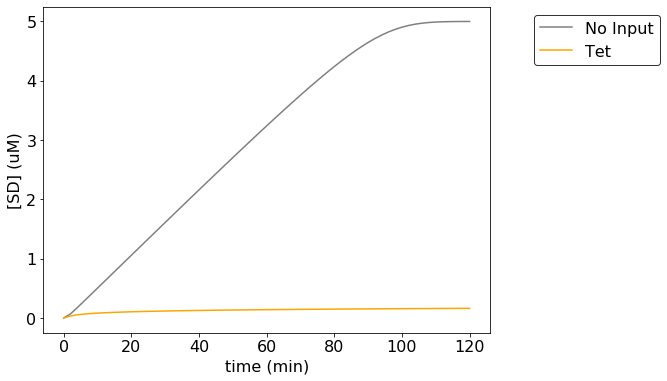

In [7]:
font = {'family' : 'sans serif',
            'weight' : 'normal',
            'size'   : 16}

plt.rc('font', **font)

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(t, ninput, color="grey", label="No Input")
ax.plot(t, Tet, color="orange", label="Tet")
plt.xlabel("time (min)")
plt.ylabel("[SD] (uM)")
plt.legend(bbox_to_anchor=(1.4, 1.0),loc="upper right", frameon=True, edgecolor = 'black')
plt.savefig('NOT_Tet', bbox_inches="tight")

### Saving the result to a csv file:

In [8]:
rows = zip(ninput,Tet)
with open('NOT_Tet.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
        

df = pd.read_csv('NOT_Tet.csv', header=None)
df.rename(columns={0: 'No Input', 1: 'Tet'}, inplace=True)
df.to_csv('NOT_Tet.csv', index=False)